# Research on car sales ads

We are analysts at Crankshaft List. Hundreds of free advertisements for vehicles are published on our site every day.

We studied the data collected over the last few years and try to determine which factors influence the price of a vehicle.

We will deal with missing values, change data types and use some graphs for more valuable conclusions.

**Project Steps** <a class="anchor" id="table_of_contents"></a>  
[Data file and general info](#chapter1)  
[Data preprocessing](#chapter2)  
[Calculations](#chapter3)  
[Exploratory data analysis](#chapter4)  
[Overall conclusion](#chapter5)  

## Data file and general info 
<a class="anchor" id="chapter1"></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

#open the data file
try:
    data = pd.read_csv('vehicles_us.csv')
except:
    data = pd.read_csv('/datasets/vehicles_us.csv')

#show general information
display(data.info(),data.head(10),data.isna().mean() * 100 )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      47906 non-null float64
model           51525 non-null object
condition       51525 non-null object
cylinders       46265 non-null float64
fuel            51525 non-null object
odometer        43633 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     42258 non-null object
is_4wd          25572 non-null float64
date_posted     51525 non-null object
days_listed     51525 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


None

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


price            0.000000
model_year       7.023775
model            0.000000
condition        0.000000
cylinders       10.208637
fuel             0.000000
odometer        15.316836
transmission     0.000000
type             0.000000
paint_color     17.985444
is_4wd          50.369723
date_posted      0.000000
days_listed      0.000000
dtype: float64

The missing values are shown as a percentage of the data. The largest amount of missing values is in `is_4wd` followed by `paint_color`, then `odometer`, then `cylinders` and at last `model_year`. Possible reasons for missing values are for `cylinders` they might not know, `model_year`and `odometer` might be left out for 'older' vhicles and `paint_color` might seem unrelevant.
It seems that if a vehicle doesn't have 4-wheel drive it is marked with NaN in the `is_4wd` column. This column should be boolean type instead of float. Let's check the unique values in this column.

In [2]:
#the unique values of the column
data['is_4wd'].unique()

array([ 1., nan])

Our assumption was right, we need to change the column type to boolean and make sure that all NaN values are converted to False. We will try to evalueate the missing values in `cylinders` and `model_year` based on other parameters. The missing values in `paint_color` will be hard to guess so we will categorize them as 'other' and the same is for `odometer`, we'll define the missing values as 'undefined'. We will add a new column of estimated values of `odometer` and will see if there's affect by the change.

In [3]:
#show the unique values of each categorical columns and the span of the numeric columns
display(data['model'].unique(),data['type'].unique(), data['condition'].unique(),
        data['transmission'].unique() ,data['fuel'].unique(), data['model_year'].describe(),
        data['days_listed'].describe(), data['price'].describe(), data['odometer'].describe(),
        data['date_posted'].max(), data['date_posted'].min()
)

array(['bmw x5', 'ford f-150', 'hyundai sonata', 'chrysler 200',
       'chrysler 300', 'toyota camry', 'honda pilot', 'kia sorento',
       'chevrolet silverado 1500', 'honda accord', 'ram 1500',
       'gmc yukon', 'jeep cherokee', 'chevrolet traverse',
       'hyundai elantra', 'chevrolet tahoe', 'toyota rav4',
       'chevrolet silverado', 'jeep wrangler', 'chevrolet malibu',
       'ford fusion se', 'chevrolet impala', 'chevrolet corvette',
       'jeep liberty', 'toyota camry le', 'nissan altima',
       'subaru outback', 'toyota highlander', 'dodge charger',
       'toyota tacoma', 'chevrolet equinox', 'nissan rogue',
       'mercedes-benz benze sprinter 2500', 'honda cr-v',
       'jeep grand cherokee', 'toyota 4runner', 'ford focus',
       'honda civic', 'kia soul', 'chevrolet colorado',
       'ford f150 supercrew cab xlt', 'chevrolet camaro lt coupe 2d',
       'chevrolet cruze', 'ford mustang', 'chevrolet silverado 3500hd',
       'nissan frontier crew cab sv', 'subaru imp

array(['SUV', 'pickup', 'sedan', 'truck', 'coupe', 'van', 'convertible',
       'hatchback', 'wagon', 'mini-van', 'other', 'offroad', 'bus'],
      dtype=object)

array(['good', 'like new', 'fair', 'excellent', 'salvage', 'new'],
      dtype=object)

array(['automatic', 'manual', 'other'], dtype=object)

array(['gas', 'diesel', 'other', 'hybrid', 'electric'], dtype=object)

count    47906.000000
mean      2009.750470
std          6.282065
min       1908.000000
25%       2006.000000
50%       2011.000000
75%       2014.000000
max       2019.000000
Name: model_year, dtype: float64

count    51525.00000
mean        39.55476
std         28.20427
min          0.00000
25%         19.00000
50%         33.00000
75%         53.00000
max        271.00000
Name: days_listed, dtype: float64

count     51525.000000
mean      12132.464920
std       10040.803015
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: price, dtype: float64

count     43633.000000
mean     115553.461738
std       65094.611341
min           0.000000
25%       70000.000000
50%      113000.000000
75%      155000.000000
max      990000.000000
Name: odometer, dtype: float64

'2019-04-19'

'2018-05-01'

We see that everything is ok about the categories in `model`,`type`,`condition`,`transmission` and `fuel`. The oldest vehicle is from 1908. The ads were posted between May 2018 and April 2019. There are three interesting values: the first is '0' for the `days_listed`, the second is '1' for `price` and the last one is '0' for `odometer`. We need to check all of them.

In [4]:
#show the rows where days_listed is equal to '0' and count the percentage of the data
display(
    data[data['days_listed'] == 0].groupby('date_posted')['days_listed'].count(),print('The precentage of the data: {:.2%}'.format(data[data['days_listed'] == 0]['days_listed'].count()/len(data))),
    data[data['days_listed'] == 0].head(10)
)

The precentage of the data: 0.10%


date_posted
2018-05-11    1
2018-05-15    1
2018-05-20    1
2018-05-29    1
2018-05-31    1
2018-06-12    1
2018-06-18    1
2018-07-05    1
2018-07-06    1
2018-07-11    1
2018-07-13    1
2018-07-17    1
2018-07-21    1
2018-07-30    1
2018-07-31    1
2018-08-02    1
2018-08-07    1
2018-08-11    1
2018-08-12    1
2018-08-13    1
2018-08-19    1
2018-08-27    2
2018-09-02    1
2018-09-03    1
2018-09-09    1
2018-09-16    1
2018-09-21    1
2018-09-23    1
2018-09-25    1
2018-09-27    1
2018-09-28    1
2018-10-14    1
2018-10-16    1
2018-10-22    1
2018-10-23    1
2018-10-30    1
2018-10-31    1
2018-11-30    1
2018-12-17    1
2018-12-31    1
2019-01-13    1
2019-01-21    1
2019-01-27    1
2019-02-06    1
2019-02-09    1
2019-03-04    1
2019-03-09    1
2019-03-15    1
2019-03-18    1
2019-03-23    1
2019-03-26    1
2019-04-11    1
2019-04-16    1
Name: days_listed, dtype: int64

None

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
1247,14995,2008.0,chevrolet silverado 1500,excellent,8.0,gas,93300.0,automatic,truck,grey,1.0,2018-05-15,0
1711,59589,2019.0,chevrolet silverado 2500hd,excellent,8.0,diesel,NaN,automatic,truck,white,1.0,2019-01-13,0
1983,14000,1999.0,ford f250,excellent,8.0,diesel,137500.0,automatic,truck,red,1.0,2018-09-27,0
2883,4000,2004.0,ram 1500,excellent,8.0,gas,250000.0,automatic,truck,brown,1.0,2018-08-13,0
3965,16750,1985.0,chevrolet corvette,like new,8.0,gas,24540.0,automatic,hatchback,white,NaN,2018-10-14,0
4567,5000,2007.0,toyota corolla,good,4.0,gas,223000.0,manual,sedan,silver,NaN,2018-07-11,0
4901,12500,2001.0,ram 1500,good,8.0,gas,99892.0,automatic,truck,black,1.0,2018-05-11,0
6114,500,2003.0,dodge dakota,fair,6.0,gas,215457.0,automatic,pickup,NaN,NaN,2018-10-31,0
6548,4800,2007.0,honda odyssey,good,6.0,gas,152400.0,automatic,mini-van,brown,NaN,2018-09-25,0
7036,5900,2007.0,jeep grand cherokee laredo,excellent,6.0,gas,NaN,automatic,SUV,grey,1.0,2018-07-21,0


There are few possible reasons for such a short time. Maybe the users changed their minds about selling the vehicle, pretty extreme but maybe the vehicle was bought at the same day. It doesn't seem to be related to the posting date, and it's about 0.1% of the data so we leave it unchanged. Now we will check about the prices that set to '1'.

In [5]:
#show the rows where price is equal to '1' and count the percentage of the data
display(
    data[data['price'] == 1],print('The precentage of the data: {:.2%}'.format(data[data['price'] == 1]['price'].count()/len(data)))
)

The precentage of the data: 1.55%


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
405,1,2014.0,chevrolet camaro,excellent,6.0,gas,71310.0,automatic,coupe,NaN,NaN,2018-07-14,29
3063,1,1998.0,chevrolet silverado,good,8.0,gas,164000.0,automatic,pickup,NaN,1.0,2018-10-11,49
3808,1,2007.0,chevrolet tahoe,good,8.0,gas,200.0,automatic,SUV,red,NaN,2019-03-18,63
3902,1,1996.0,ford f-150,fair,NaN,gas,163000.0,manual,truck,white,NaN,2019-02-23,54
4140,1,2004.0,chevrolet silverado,excellent,8.0,diesel,83000.0,automatic,pickup,NaN,1.0,2019-02-04,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49699,1,2007.0,chevrolet trailblazer,excellent,8.0,gas,NaN,automatic,SUV,black,1.0,2018-08-06,28
49709,1,NaN,ford f150,excellent,8.0,gas,139700.0,other,pickup,red,1.0,2019-03-11,18
50245,1,1986.0,chevrolet silverado,good,8.0,gas,NaN,automatic,truck,red,1.0,2018-11-30,50
50393,1,2003.0,gmc sierra 2500hd,good,8.0,diesel,212300.0,automatic,pickup,black,1.0,2019-04-12,28


None

Maybe people preffer to set the price to '1' as they might think the raiting and views for such price will be higher. This is about 1.5% of the data. We will not change these values for now as it is the main variable of interest of our analysis. Now we will check the rows where `odometer` is equal to '0', there is two possible reasons: the same as '1' for the price they might think it will rank the post higher, the other option is that it is a new car first hand. Let's check!

In [6]:
#show the number of rows where odometer is equal to '0' in each condition and count the percentage of the data
display(
    data[data['odometer'] == 0]['condition'].value_counts() ,print('The precentage of the data: {:.2%}'.format(data[data['odometer'] == 0]['odometer'].count()/len(data)))
)

The precentage of the data: 0.36%


good         104
excellent     69
fair           6
like new       4
salvage        2
Name: condition, dtype: int64

None

It seems that the first reason is possible, as there are no cars with '0' odometer that are new. Maybe the new cars has some missing values in odometer because they didn't fill as it is new?

In [7]:
data[data['condition'] == 'new']['odometer'].isna().sum()

18

In [8]:
data[data['condition'] == 'new']['odometer'].describe()

count       125.000000
mean      43476.056000
std       67269.684251
min           5.000000
25%          21.000000
50%        8002.000000
75%       69000.000000
max      315000.000000
Name: odometer, dtype: float64

As we can see, most of the new cars are not exactly new. Probably the same reason as above - defining the vehicle as new might influence on the raiting and views.

### Conclusion

- We have some missing values at `model_year`, `cylinders`, `odometer`, `paint_color` and `is_4wd`
- We can try to evaluate the missing values in `model_year` cloumn based on `odometer` and most common value for the `model`.
- We can try to evaluate the missing values in `cylinders` cloumn based on `model` and `model_year`.
- It will be hard to find a good approximation for `paint_color` based on other parameters and it is not directly related to the analysis we are conducting. We will change the missing values and group them as 'other'.
- Also `odometer` has a lot of missing values, we'll define the missing values as '0' which will considered as 'undefined', because by deleting them we will lose a lot of valuable data and we think it is wrong to try guessing them. We will add a column with estimations to help evaluate other parameters.
- The False values in `is_4wd` are shown as NaN, and the column type is float. We need to change it to boolean so the NaNs will be transformed to False.
- `model_year`, `odometer` and `cylinders` types are floats and they should be converted to int because years and cylinders are whole numbers and the fractions in odometers are irrelevant.
- `date_posted` type is object and it should be converted to datetime type.
- Most of the vehicles that are mentioned as new, have a pretty large odometer for a new one.
- Could be nice to categorize the data also by manufacturer and not only by model.

## Data preprocessing
<a class="anchor" id="chapter2"></a>

First we will fill the missing values where we can do it.

In [9]:
#save a copy of the original dataset
data_original = data.copy()

#fill in the missing values
data['odometer_filled'] = data['odometer'].fillna(data.groupby(['model_year','model'])['odometer'].transform('median'))
data['odometer'].fillna(0, inplace = True)
data['is_4wd'].fillna(0, inplace = True)
data['model_year'].fillna(data.groupby(['model','odometer_filled'])['model_year'].transform('median'), inplace = True)
data['cylinders'].fillna(data.groupby(['model_year','model'])['cylinders'].transform('median'), inplace = True)

data['paint_color'].fillna('other', inplace = True)

#check for missing values
data.isna().sum()

price                 0
model_year         2080
model                 0
condition             0
cylinders           245
fuel                  0
odometer              0
transmission          0
type                  0
paint_color           0
is_4wd                0
date_posted           0
days_listed           0
odometer_filled     625
dtype: int64

We remain with much less missing values, about few percentage of the data. It will be better to remove them because we did the best estimation we could.

In [10]:
#drop the remaining missing values
data.dropna(subset = ['model_year','cylinders','odometer_filled'],inplace = True)
#check for missing values
data.isna().sum()

price              0
model_year         0
model              0
condition          0
cylinders          0
fuel               0
odometer           0
transmission       0
type               0
paint_color        0
is_4wd             0
date_posted        0
days_listed        0
odometer_filled    0
dtype: int64

In [11]:
#the percentage of the removed values from the original dataset
100-len(data)*100/len(data_original)

4.246482290150411

Now we will change the data types of `is_4wd` to boolean, `model_year`,`odometer` and `cylinders` to int and `date_posted` to datetime.

In [12]:
#change the data types
data = data.astype({'model_year':'int','cylinders':'int', 'odometer':'int', 'odometer_filled':'int','is_4wd':'bool'})
data['date_posted']= pd.to_datetime(data['date_posted'], format='%Y-%m-%d')
#check if changed
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49337 entries, 0 to 51524
Data columns (total 14 columns):
price              49337 non-null int64
model_year         49337 non-null int64
model              49337 non-null object
condition          49337 non-null object
cylinders          49337 non-null int64
fuel               49337 non-null object
odometer           49337 non-null int64
transmission       49337 non-null object
type               49337 non-null object
paint_color        49337 non-null object
is_4wd             49337 non-null bool
date_posted        49337 non-null datetime64[ns]
days_listed        49337 non-null int64
odometer_filled    49337 non-null int64
dtypes: bool(1), datetime64[ns](1), int64(6), object(6)
memory usage: 5.3+ MB


## Make calculations and add them to the table
<a class="anchor" id="chapter3"></a>

Now we will add some calculations we were asked to do:
- The weekday of the post, the month and the year.
- The age of the vhicle when the ad was posted and the avarage milage per year. The age can be sometimes zero or even negative in cases that the `model_year` was estimated. That will also affect the milage per year calculation, so vehicles that are less than 1 year old their `mileage_per_year` will be the same as the `odometer`.
- Replace the `condition` string values to numeric (new = 5, like new = 4, excellent = 3, good = 2, fair = 1, salvage = 0).

In [13]:
#replace the `condition` string values to numeric
data['condition'].replace(['new', 'like new', 'excellent', 'good', 'fair', 'salvage'], [5, 4, 3, 2, 1, 0], inplace = True)

#create new columns
data['weekday_post'] = pd.DatetimeIndex(data['date_posted']).weekday
data['month_post'] = pd.DatetimeIndex(data['date_posted']).month
data['year_post'] = pd.DatetimeIndex(data['date_posted']).year
data['vehicle_age'] = data['year_post'] - data['model_year']

#mileage per year for vehicles that are at least 1 year old
data['mileage_per_year'] = (data.query('vehicle_age > 0')['odometer']/data.query('vehicle_age > 0')['vehicle_age'])

#mileage per year for vehicles that are less than 1 year old - the same value as in 'odometer'
data['mileage_per_year'].where(data['vehicle_age'] > 0, data['odometer'], inplace = True)

#check that 'mileage_per_year' for vehicles that are less than 1 year old is the same as in 'odometer'
data[data['vehicle_age'] < 1].head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,odometer_filled,weekday_post,month_post,year_post,vehicle_age,mileage_per_year
19,13990,2018,hyundai elantra,3,4,gas,31932,automatic,sedan,red,False,2018-08-25,27,31932,5,8,2018,0,31932.0
71,23300,2018,nissan frontier crew cab sv,2,6,gas,27493,other,pickup,other,True,2018-10-13,36,27493,5,10,2018,0,27493.0
78,23800,2019,nissan frontier crew cab sv,2,6,gas,10899,other,pickup,silver,True,2019-02-28,30,10899,3,2,2019,0,10899.0
99,39950,2018,chevrolet silverado,3,8,gas,18500,automatic,truck,other,True,2018-08-05,16,18500,6,8,2018,0,18500.0
106,21500,2019,nissan frontier crew cab sv,2,6,gas,16168,other,pickup,white,False,2019-03-29,70,16168,4,3,2019,0,16168.0


## Carry out exploratory data analysis
<a class="anchor" id="chapter4"></a>

First we will study the following parameters: price, vehicle's age when the ad was placed, mileage, number of cylinders and condition. We will find how outliers affect the form and readability of the histograms.

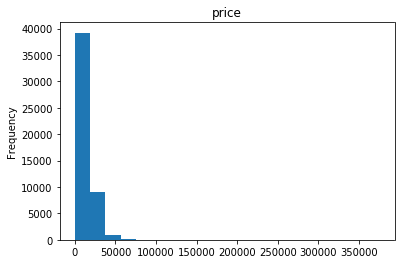

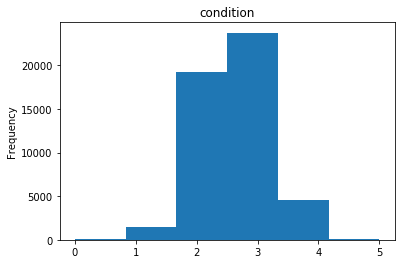

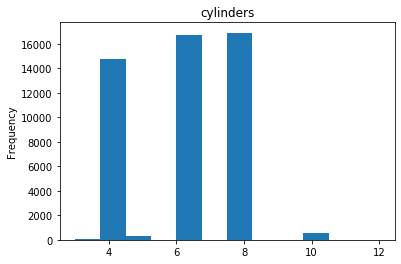

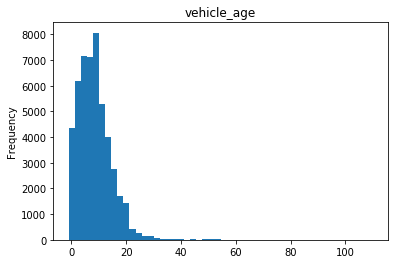

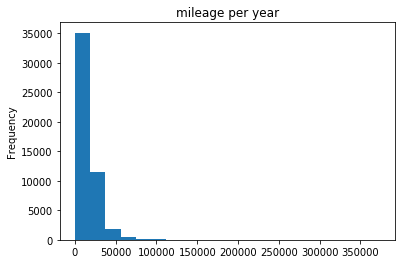

In [14]:
#plot histograms for the relevant parameters
data['price'].plot(kind = 'hist', bins = 20, title = 'price')
plt.show()
data['condition'].plot(kind = 'hist', bins = 6, title = 'condition')
plt.show()
data['cylinders'].plot(kind = 'hist', bins = 12, title = 'cylinders')
plt.show()
data['vehicle_age'].plot(kind = 'hist', bins = 50, title = 'vehicle_age')
plt.show()
data['mileage_per_year'].plot(kind = 'hist', bins = 20, title = 'mileage per year')
plt.show()

From the histograms we can inffer that the majority of the vehicles that are posted are between 0 to 20 yeas old and the majority of the vehicle's milage per year is between 0 to 50000. Probably we have some extreme values at milage per year and vehicle's age because the range is very big.
The majority of the vehicles is sold for between 0 to 25000 (probably not exactly 0 because it mean it is for free) and we have some very extreme values and thats why the range is so wide. Most of the vehicles are defined as excellent or good. Most of the vehicles has standart number of cylinders (4,6 or 8). Let's find the outliers in our data by viewing the statistical summary of the numeric parameters.

In [15]:
display(
    data['price'].describe(), data['vehicle_age'].describe(), data['mileage_per_year'].describe()
)

count     49337.000000
mean      12154.500010
std       10039.634533
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16900.000000
max      375000.000000
Name: price, dtype: float64

count    49337.000000
mean         8.522934
std          6.197777
min         -1.000000
25%          4.000000
50%          7.000000
75%         12.000000
max        110.000000
Name: vehicle_age, dtype: float64

count     49337.000000
mean      15345.786653
std       13924.688807
min           0.000000
25%        7629.333333
50%       13472.666667
75%       20000.000000
max      373200.000000
Name: mileage_per_year, dtype: float64

Prices that are higher than 20000 and less than 1000 are rare. We have some outliers in the `vehicle_age` because of the estimation so where the age is less than '0' it doesn't make sense. We have a vehicle from 1908 thus the range is very wide, would be more accurate to see the distibution between 0 to 15. In the `mileage_per_year` the '0' values are where the odometer wasn't defined so these are outliers but the normal values are between 5000 and 25000. Let's filter the data and see the histograms at the ranges that we have mentioned.

In [16]:
filtered_data = data.query(
    '1000<price<20000 & 0<=vehicle_age<=15 & 5000<=mileage_per_year<=25000'
).reset_index()

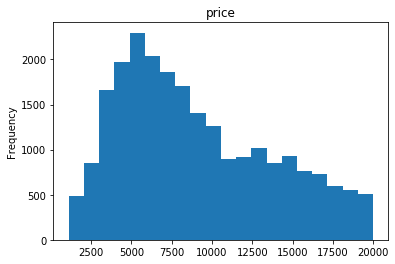

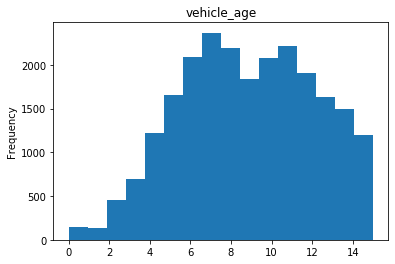

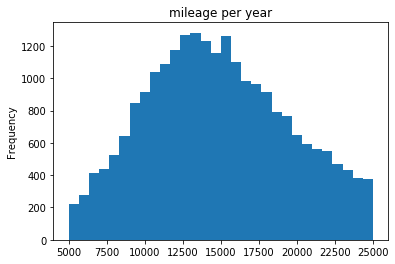

In [17]:
filtered_data['price'].plot(kind = 'hist', bins = 20, title = 'price')
plt.show()
filtered_data['vehicle_age'].plot(kind = 'hist', bins = 16, title = 'vehicle_age')
plt.show()
filtered_data['mileage_per_year'].plot(kind = 'hist', bins = 30, title = 'mileage per year')
plt.show()

We can see now there are no outliers that skew the histograms. Now let's check the correlations between the parameters.

In [18]:
filtered_data[['price', 'condition','mileage_per_year','is_4wd','vehicle_age','cylinders']].corr()

,price,condition,mileage_per_year,is_4wd,vehicle_age,cylinders
price,1.000000,0.191759,0.058514,0.313931,-0.456707,0.319061
condition,0.191759,1.000000,-0.026503,-0.008333,-0.240377,-0.111154
mileage_per_year,0.058514,-0.026503,1.000000,-0.015001,-0.421816,-0.064329
is_4wd,0.313931,-0.008333,-0.015001,1.000000,0.163116,0.406825
vehicle_age,-0.456707,-0.240377,-0.421816,0.163116,1.000000,0.323006
cylinders,0.319061,-0.111154,-0.064329,0.406825,0.323006,1.000000


We can see there is some negative correlation between price and vehicle's age, which makes sense because when the vehicle's age is higher, the lower the price. Also the condition and having a 4WD and the number of cylinders have some positive correlation with the price, the better the condition of the car, it costs more, the higher the engine's power (affected by the number of cylinders) the higher the price. We can inffer that the most influencing parameters on the price are: vehicle's age, having 4WD and number of cylinders.

Now we want to check what is the typical lifetime of an ad:

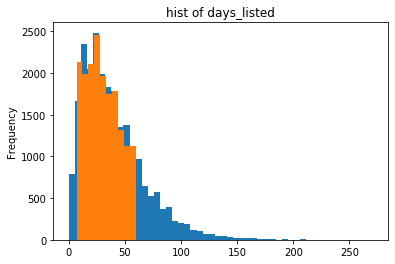

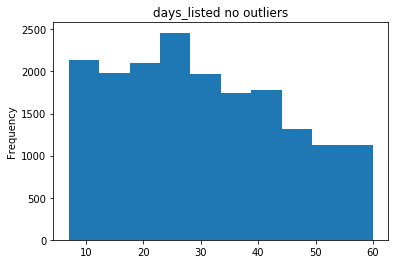

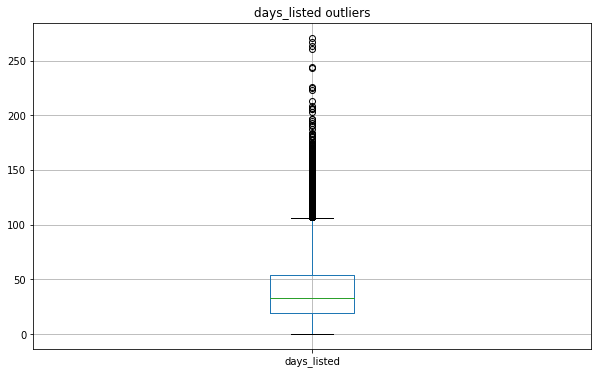

count    23319.000000
mean        39.778464
std         28.315792
min          0.000000
25%         19.000000
50%         33.000000
75%         54.000000
max        271.000000
Name: days_listed, dtype: float64

In [19]:
filtered_data['days_listed'].plot(kind = 'hist', bins = 50, title = 'hist of days_listed')
filtered_data['days_listed'].plot(kind = 'hist', range = (7,60))
plt.show()
filtered_data['days_listed'].plot(kind = 'hist', range = (7,60), title = 'days_listed no outliers')
plt.show()
filtered_data['days_listed'].plot(kind = 'box', grid = True, figsize = (10,6),  title = 'days_listed outliers')
plt.show()
filtered_data['days_listed'].describe()

We can see that a typical lifetime of an ad is between a week till two months. If an ad was removed less than a week after it was posted it considered as quickly. Abnormally long time for an ad is above 100.

Now we want to analyze the number of ads and the average price for each type of vehicle.

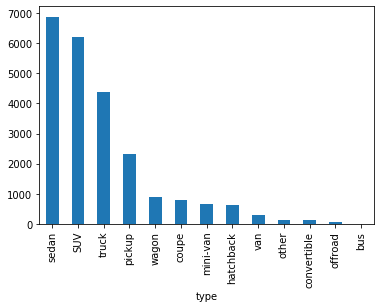

,count,mean
,price,price
type,,
sedan,6881,6705.623601
SUV,6196,9147.792931
truck,4363,11862.702040
pickup,2310,10893.496104
wagon,902,8599.764967
coupe,787,10167.648030
mini-van,648,7002.645062
hatchback,616,6559.418831


In [20]:
popular_type = filtered_data.pivot_table(index = 'type', values = 'price', aggfunc = ['count','mean']).sort_values([('count','price')], ascending = False)
popular_type[('count','price')].plot(kind='bar')
plt.show()
popular_type

We can see that the most common ads are for **sedan** and **SUV**.

What factors impact the price most? For the popular types we detected at the previous stage we'll try to find out whether the price depends on age, mileage, condition, transmission type, and color.

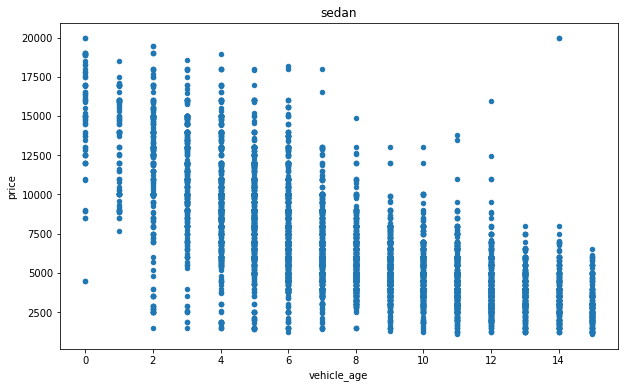

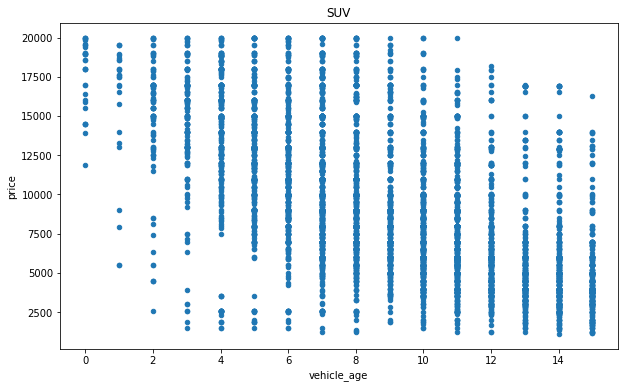

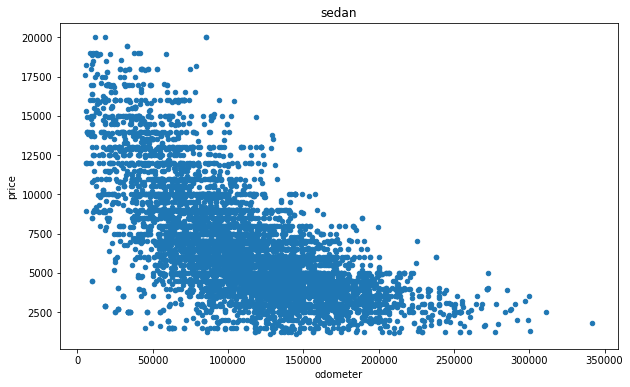

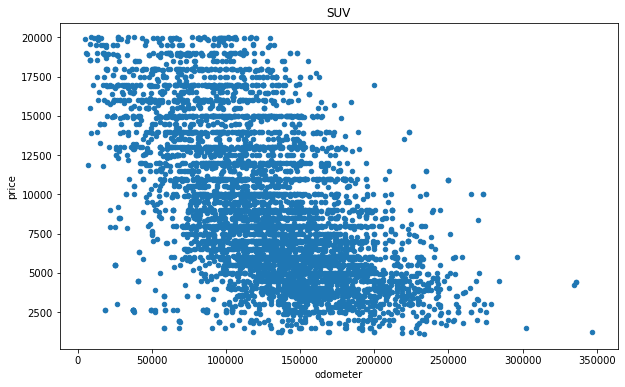

In [21]:
for parameter in ['vehicle_age','odometer']:
    filtered_data.query('type == "sedan"').plot(x = parameter, y= 'price', kind = 'scatter', title = 'sedan', figsize = (10,6))
    plt.show()
    filtered_data.query('type == "SUV"').plot(x = parameter, y= 'price', kind = 'scatter', title = 'SUV',figsize = (10,6))
    plt.show()

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


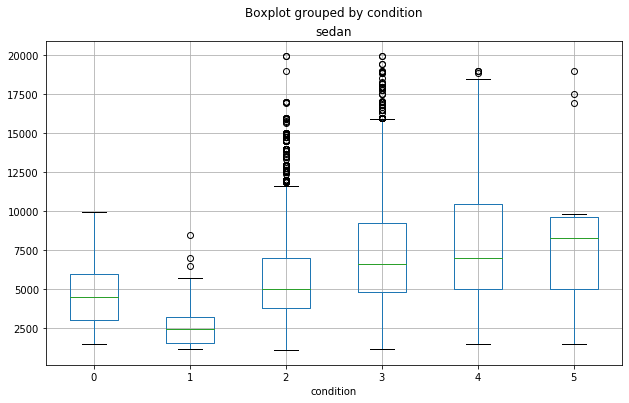

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


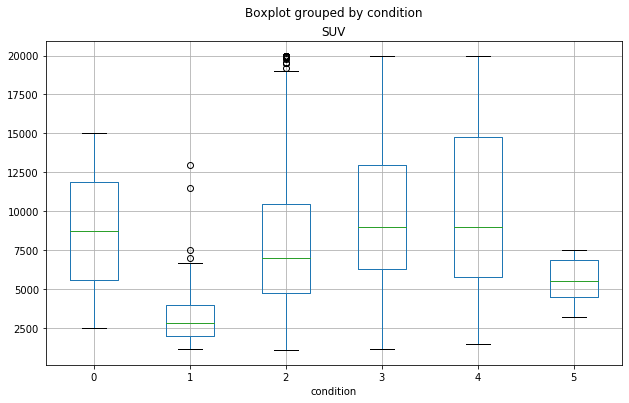

In [22]:
filtered_data.query('type == "sedan"').boxplot('price',by = 'condition' , figsize = (10,6))
plt.title('sedan')
plt.show()
filtered_data.query('type == "SUV"').boxplot('price',by = 'condition', figsize = (10,6))
plt.title('SUV')
plt.show()

In [23]:
display(
    "Correlation matrix for sedan:",
    filtered_data.query('type == "sedan"')[['price', 'condition','odometer','vehicle_age','cylinders']].corr(),
    "Correlation matrix for SUV:",
    filtered_data.query('type == "SUV"')[['price', 'condition','odometer','vehicle_age','cylinders']].corr()
)

'Correlation matrix for sedan:'

,price,condition,odometer,vehicle_age,cylinders
price,1.000000,0.284834,-0.673224,-0.701034,-0.028389
condition,0.284834,1.000000,-0.299534,-0.261185,-0.083392
odometer,-0.673224,-0.299534,1.000000,0.709634,0.147066
vehicle_age,-0.701034,-0.261185,0.709634,1.000000,0.219492
cylinders,-0.028389,-0.083392,0.147066,0.219492,1.000000


'Correlation matrix for SUV:'

,price,condition,odometer,vehicle_age,cylinders
price,1.000000,0.222287,-0.580476,-0.610241,0.021010
condition,0.222287,1.000000,-0.272402,-0.241205,-0.099848
odometer,-0.580476,-0.272402,1.000000,0.659387,0.341274
vehicle_age,-0.610241,-0.241205,0.659387,1.000000,0.374149
cylinders,0.021010,-0.099848,0.341274,0.374149,1.000000


In both we can see there is strong negative correlation between price and vehicle's age, the higer the age of a vehicle' the lower its price. The same is for odometer, the larger the odometer, the cheaper the car is. The condition has a positive correlation with the price. The better the condition the higher the price!

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


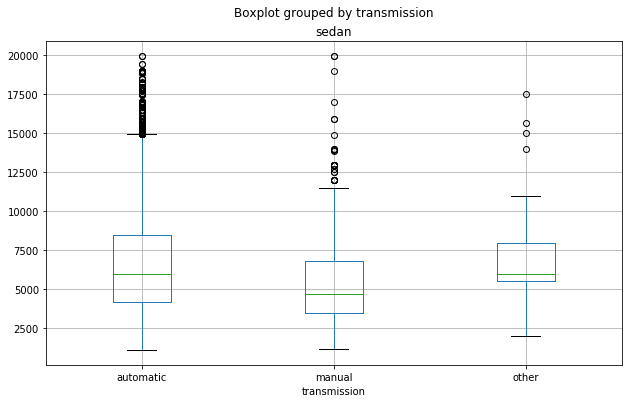

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


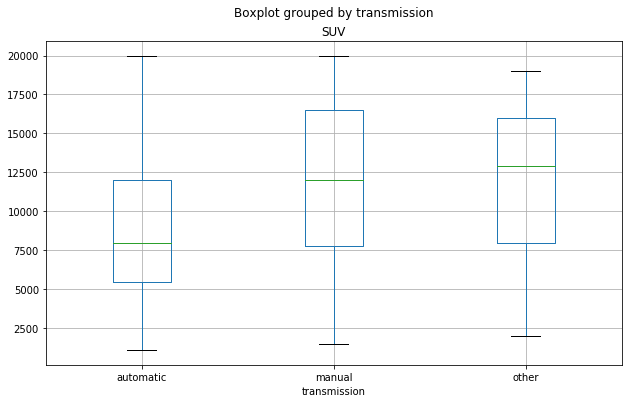

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


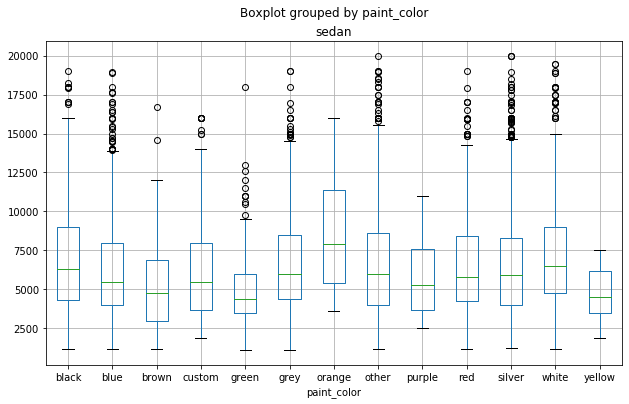

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


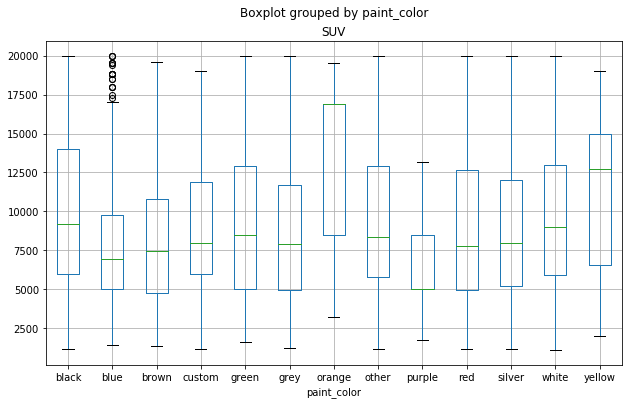

In [24]:
for parameter in ['transmission','paint_color']:
    filtered_data[filtered_data['type'] == 'sedan'].boxplot(column='price', by=parameter, figsize = (10,6))
    plt.title('sedan')
    plt.show()
    filtered_data[filtered_data['type'] == 'SUV'].boxplot(column='price', by=parameter, figsize = (10,6))
    plt.title('SUV')
    plt.show()

In general we can say that SUVs are more expensive than sedans. And most of the cases the different parameters influence the same way on the price.
- vehicle's age: the older the vehicle is, the cheaper it is.
- total mileage: the bigger the total mileage, the cheaper the vehicle is.
- condition: better condition leads to a higher price
- transmission: for sedans, automatic transmission is a bit more expensive than the others and for SUV manual transmission and other types are about the same price but higher than the automatic one.
- color: surprisingly, for both types of vehicles, orange and black vehicles are the price leaders.

## Overall conclusion
<a class="anchor" id="chapter5"></a>

In conclusion we can say that changing perspective allows better inference. We managed to find the most popular vehicles -  sedan and SUV. We found that most of the parameters that affect the price are quite reasonable. The older a car is, the less it will cost, the higher the mileage, the more used it will be and therefore its price will be cheaper. Also in the case of a 4WD vehicle of course the price of the vehicle is more expensive. There are few differences between the types of vehicles and features that affect its price.

Next we can examine whether there is an effect of the day of the week or the month on the lifetime of the ad and how different parameters affect the price of other types of vehicles.